# Clustering embeddings

**Goal**: we want to assign embeddings to a small number of clusters that can be used as tokens for training the sequence model.

### Questions 
- how well does dimensionality reduction retain the signal from the embeddings?
- how does is this clustering method affected by data drift (emergence of new clusters) in comparison to the fibonacci spirals?


In [1]:
from pop2vec.clustering.core import estimate_and_evaluate
from pop2vec.clustering.utils import create_fake_embs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [2]:
n_true_clusters = 100
N = 5_000
n_clusters = 50
embs = create_fake_embs(n=N, n_clusters=n_true_clusters)
embs.head()


rinpersoon_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16,emb_17,emb_18,emb_19,emb_20,emb_21,emb_22,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32,emb_33,emb_34,emb_35,…,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,emb_100,emb_101,emb_102,emb_103,emb_104,emb_105,emb_106,emb_107,emb_108,emb_109,emb_110,emb_111,emb_112,emb_113,emb_114,emb_115,emb_116,emb_117,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2.7455915e7,-0.612478,1.844433,0.382152,-0.490787,0.24633,-1.594519,1.716202,0.317899,1.835844,-1.15787,0.354053,-1.234141,0.486318,-2.497476,-0.11175,-0.689388,0.333011,0.100084,-0.859227,-1.021261,-0.226951,0.22752,2.806061,-0.228252,-0.717912,-0.818166,0.144408,-1.667221,-0.640654,0.051884,-1.1266,1.780757,0.045828,1.832441,0.947338,0.13447,…,-0.109636,-1.994427,-0.925339,0.553756,1.015723,0.072114,-0.582583,-0.36811,-1.438262,0.053414,0.747478,1.694757,-0.872746,1.946292,0.254042,-1.680373,0.187371,0.685876,-1.177341,0.512037,-0.537643,2.031325,2.573327,-0.105178,-0.181656,-0.437947,-2.144727,1.008269,-0.088883,1.512507,-0.834628,-1.987216,0.379877,-0.018398,1.090658,0.456637,-1.784344
5.6150492e7,-1.110809,-1.65382,2.512298,0.994218,-1.819899,-0.709976,-0.408749,-1.813968,0.118044,-1.196501,-0.845319,-0.438712,1.669185,0.357921,1.493176,-0.022777,0.095962,0.127036,0.044538,2.692745,2.976376,-0.305321,-1.799424,0.882231,-1.019661,-0.649694,-0.00692,1.497982,-0.208631,-1.304793,-0.954954,0.15485,-0.063506,-0.534605,1.523729,0.119225,…,-1.810654,0.777993,-0.713101,1.33668,-1.140347,0.606566,0.316435,1.238749,0.421083,0.102572,-0.142866,-1.482133,-0.288422,-0.691256,0.475349,-1.751254,-0.450111,1.106724,-2.39099,-1.174741,2.160579,1.205053,-0.706534,-2.089019,0.997756,-0.968291,1.66949,-0.142705,-1.523216,0.754275,-2.501165,1.18578,0.369212,0.186606,1.576133,1.280747,-0.527313
6.880653e6,-1.606089,1.793606,-1.198669,0.789843,0.178261,-0.076713,-0.23506,-1.28731,-0.788748,-0.012408,3.262139,-0.239374,-2.146567,-3.575777,-2.304177,1.688435,2.433006,2.176979,-2.016865,2.374454,-1.471586,-0.31888,-0.154981,2.053336,-0.933398,-0.537608,-1.595806,-1.744292,-0.743768,-0.168361,-0.903586,1.478895,-5.081852,-1.726426,0.406522,1.578669,…,2.357155,-2.518308,0.981493,-1.722712,3.101375,0.204571,-0.254129,1.572022,-3.737597,-0.566627,0.996309,-2.359902,-0.861311,2.151807,0.861426,-0.110897,2.702528,-0.41604,0.173337,0.021648,-1.286748,-0.942319,-0.670065,0.683832,-1.518285,-0.403807,-0.895815,-1.833938,-0.364494,1.063696,0.591951,-1.41486,0.761668,1.164018,-1.27179,0.181476,-0.106462
1.9404644e7,1.964132,0.175022,1.960393,2.327375,2.139831,-2.085186,0.33899,-0.957638,3.006093,-0.797879,-0.168023,-1.186175,2.433149,1.585298,0.38907,-0.372222,-2.280062,-0.849191,-2.435322,0.456438,-1.234712,0.399658,2.719979,-0.929563,-0.115752,-0.824848,1.422434,1.615701,-0.934922,2.288516,-0.937707,1.378687,-0.347061,-2.334951,2.112658,-1.847097,…,1.40901,0.106492,-1.213954,0.754003,-0.476499,0.580778,0.029531,2.190213,1.92958,0.975154,-0.816388,1.470477,-1.580917,0.126857,1.729376,2.411758,-1.038116,-0.704557,-1.783693,-0.087833,1.18801,-0.184198,0.850974,-1.553841,1.07901,-1.037096,-0.842109,-0.081759,-0.685753,0.226869,1.539598,2.474629,-2.462726,-0.239182,0.373462,-0.070288,-1.071933
6.1944181e7,-0.682262,1.85273,1.660402,-1.451076,0.409044,-0.594999,0.25601,-1.825905,-1.549239,-0.764866,-0.74422,-1.909489,0.146635,-1.117922,-0.678101,-0.318877,-2.500881,-1.286517,0.893488,-2.097994,0.604827,0.995062,-0.597572,-1.432006,-0.455216,0.628258,0.011577,2.818452,0.970574,-3.280661,-1.546124,0.354545,-1.503931,-0.673138,-2.332707,0

/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


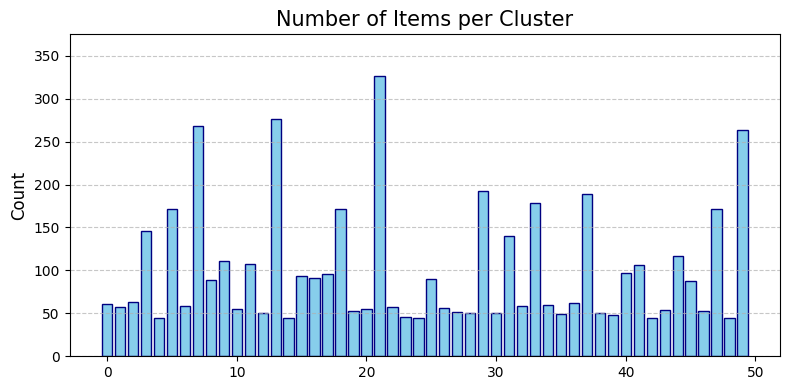

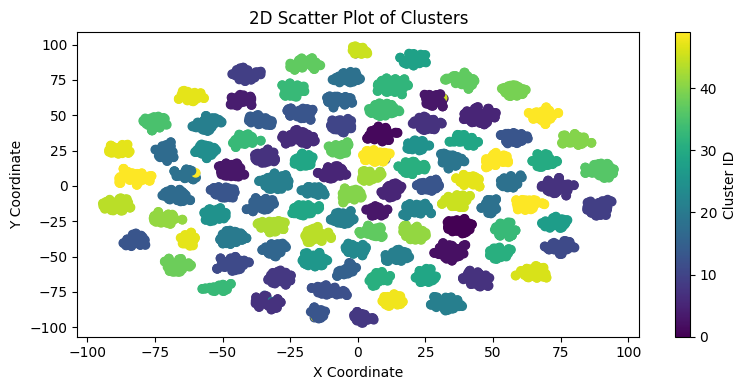

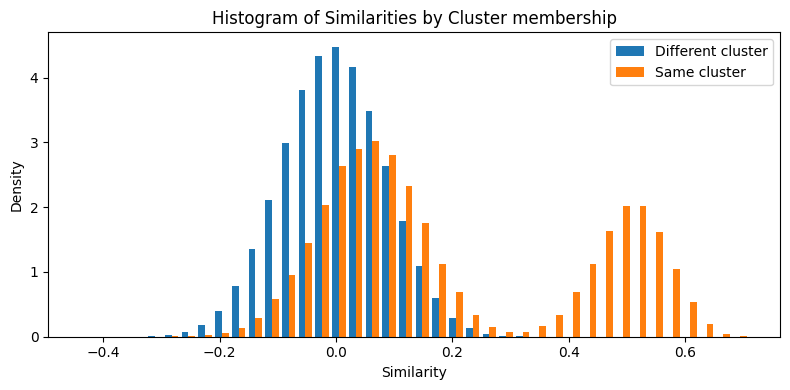

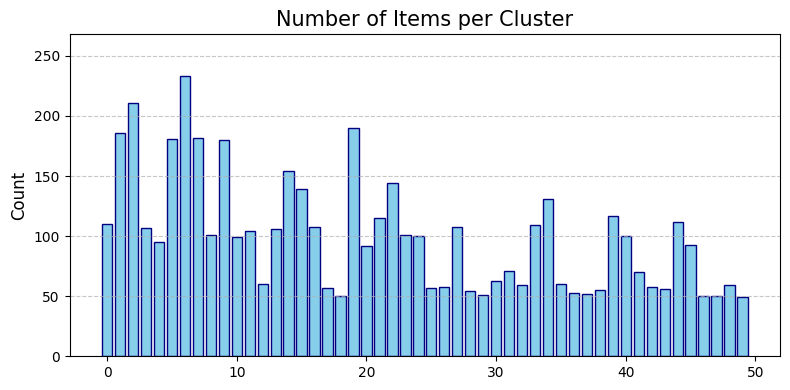

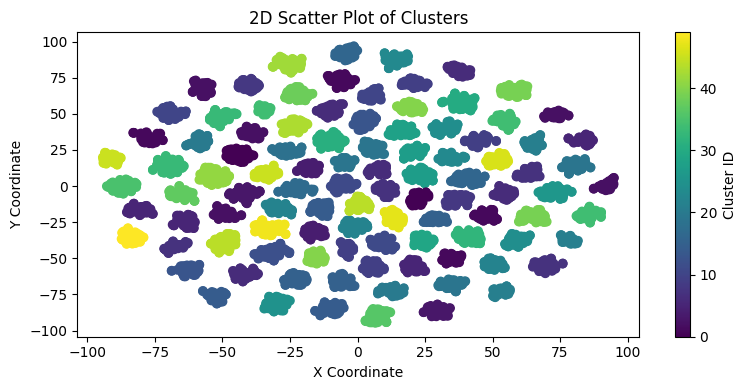

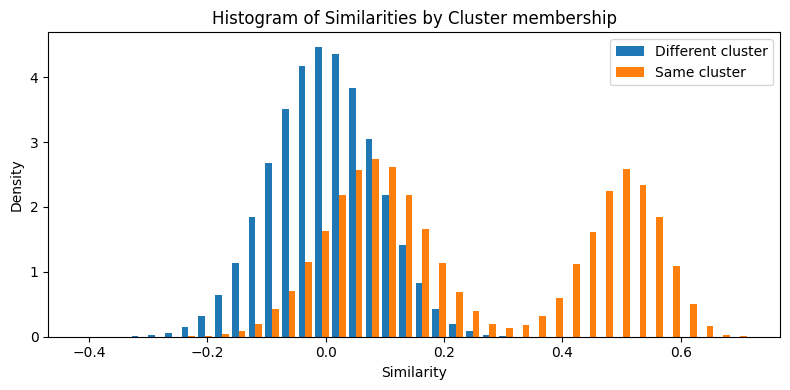

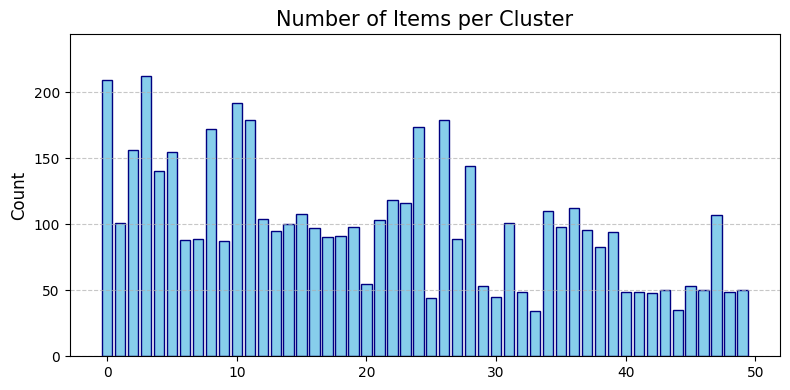

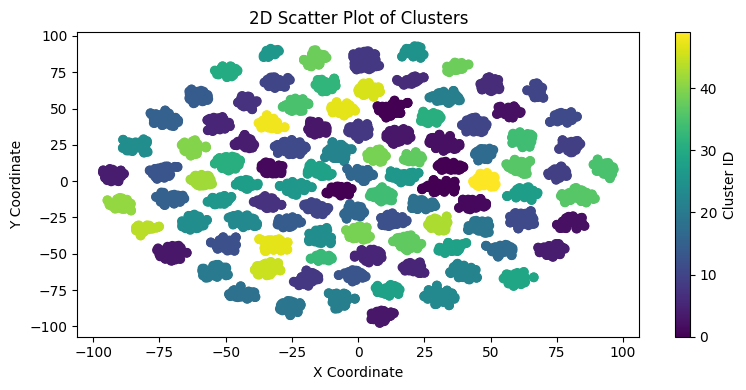

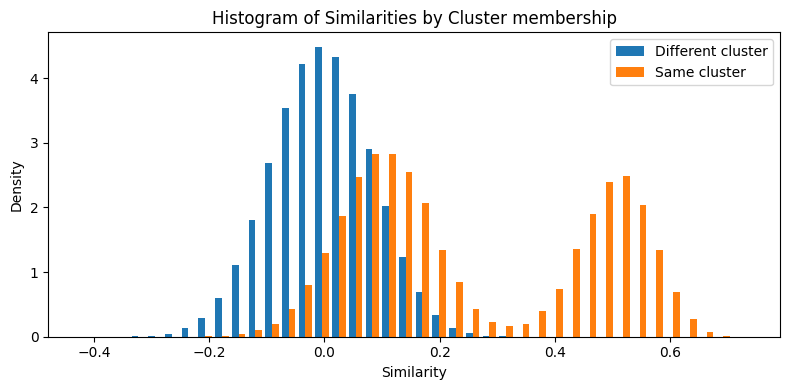

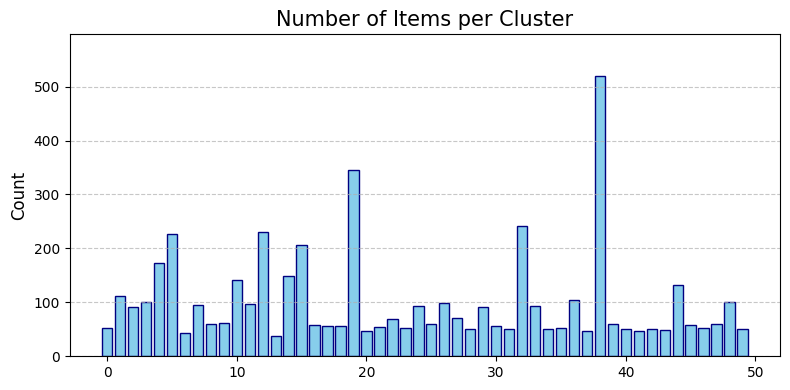

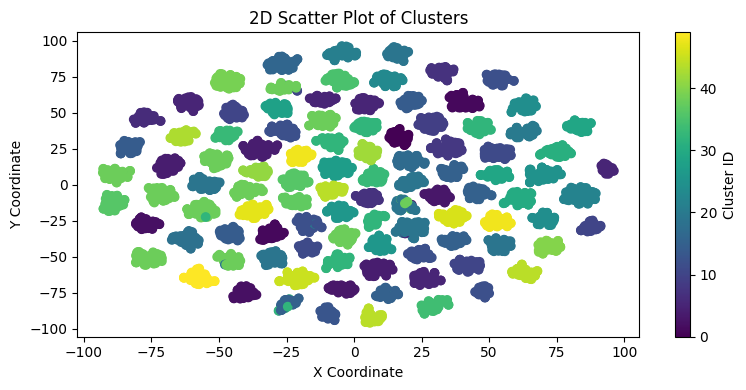

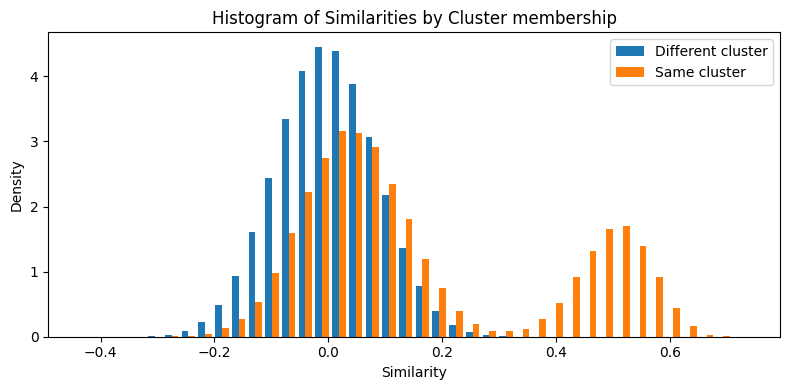

In [3]:
input_map = {
    "kmeans": KMeans(random_state=0, n_init="auto"),
    "agglom_base": AgglomerativeClustering(),
    "agglom_cosine": AgglomerativeClustering(metric="cosine", linkage="average"),
    "gmm": GaussianMixture()
}
results = {}
for name, estimator in input_map.items():
    results[name] = estimate_and_evaluate(name, estimator, embs, n_clusters) 


In [4]:
[(k, v["scores"]) for k,v in results.items()]

[('kmeans',
  {'silhouette': 0.18189422800382454,
   'calinski_harabasz': 41.22747194475841,
   'davies_bouldin': 2.6310135822724643}),
 ('agglom_base',
  {'silhouette': 0.20521184425512287,
   'calinski_harabasz': 45.43083877391977,
   'davies_bouldin': 2.536107237970007}),
 ('agglom_cosine',
  {'silhouette': 0.20577596076209956,
   'calinski_harabasz': 42.777060551569576,
   'davies_bouldin': 2.4331697176779183}),
 ('gmm',
  {'silhouette': 0.17922495583519227,
   'calinski_harabasz': 41.71787141629667,
   'davies_bouldin': 2.693503603102461})]

### Summary
- agglomerative yields more equal-sized clusters
- little difference is closeness to own centroid
- the bivariate distributions are indicative of how well spatial information from original embeddings is preserved by clustering
- scoring metrics do not necessarily agree

To do next
- [x] look at bivariate distributions of cosine distances between units in same and different clusters
- [ ] ~~predict defining features of the network: municipality id? -> for clustering id, use the majority class or something?~~
- [ ] ~~spearman's rank correlation between the cluster centroid coordinates and the person coordinates~~
- [ ] make agglomerative more robust / use distance-specific stopping rule instead of hard-coded n clusters?

In [5]:
# TODO: use embs etc more consistently
# TODO: avoid copy from polars to numpy?
# TODO: add here the code to create the pairwise distributions and any further code
# TODO: update path for saving figures
# TODO: how do we run predict on new data? -> kmeans better? or use nearestcentroid?